<div style="text-align: right"> IMC Prosperity </div>

<left> Team Tempname1 </left> 
<br>
<left>February 2024</left>

<h2><center> Round 2: Data Exploration </center></h2>

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from utils.DataEngine import LogInterpreter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
sys.path.append('..')

### Load Data

The codes below separately load all 3 csv files as dataframes. The column 'day' has been shifted to the begining of all dataframes and all columns have been converted to numeric. Also, a 4th dataframe 'orchids' has been created that combines all 3 dataframes in order of day. Within that dataframe, a new column 'new_timestamp' has been created to plot time series reflecting values from days -1 to 1 to avoid overlapping timestamp values.

In [3]:
prices_neg1 = pd.read_csv("../data2024/round-2-island-data-bottle/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_neg1

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490
...,...,...,...,...,...,...,...,...
9996,-1,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764
9997,-1,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300
9998,-1,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856
9999,-1,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424


In [4]:
prices_0 = pd.read_csv("../data2024/round-2-island-data-bottle/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_0

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000
1,0,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990
2,0,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980
3,0,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970
4,0,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950
...,...,...,...,...,...,...,...,...
9996,0,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100
9997,0,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806
9998,0,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530
9999,0,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260


In [5]:
prices_pos1 = pd.read_csv("../data2024/round-2-island-data-bottle/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

prices_pos1

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,1,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000
1,1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710
2,1,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395
3,1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030
4,1,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640
...,...,...,...,...,...,...,...,...
9996,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490
9997,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530
9998,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620
9999,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780


In [6]:
orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [7]:
from statsmodels.api import OLS
import statsmodels.api as sm

In [8]:
prices_neg1["MA_HUMIDITY"] = prices_neg1["HUMIDITY"].rolling(window=10).mean()
prices_neg1["MA_SUNLIGHT"] = prices_neg1["SUNLIGHT"].rolling(window=10).mean()
prices_neg1["ORCHID_LAGGED"] = prices_neg1["ORCHIDS"].shift(1)
prices_neg1.dropna(inplace=True)
sm.add_constant(prices_neg1[["MA_HUMIDITY", "MA_SUNLIGHT", "ORCHID_LAGGED"]])
model = OLS(prices_neg1["ORCHIDS"], prices_neg1[["MA_HUMIDITY", "MA_SUNLIGHT", "ORCHID_LAGGED"]], hasconst=False)
res = model.fit()

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ORCHIDS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.091e+09
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        01:44:58   Log-Likelihood:                         -13954.
No. Observations:                9992   AIC:                                  2.791e+04
Df Residuals:                    9989   BIC:                                  2.793e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MA_HUMIDITY       0.0033      0.003      1.145      0.252      -0.002       0.009
MA_SUNLIGHT    6.402e-06   2.34e-05      0.273      0.785   -3.95e-05    5.23e-05
ORCHID_LAGGED     0.9997      0.000   5661.831      0.000       0.999       1.000
==============================================================================
Omnibus:                        8.764   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.827
Skew:                           0.011   Prob(JB):                      0.00735
Kurtosis:                       3.152   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualize Data

The codes below plot timeseries plots for all variables in the data set. 

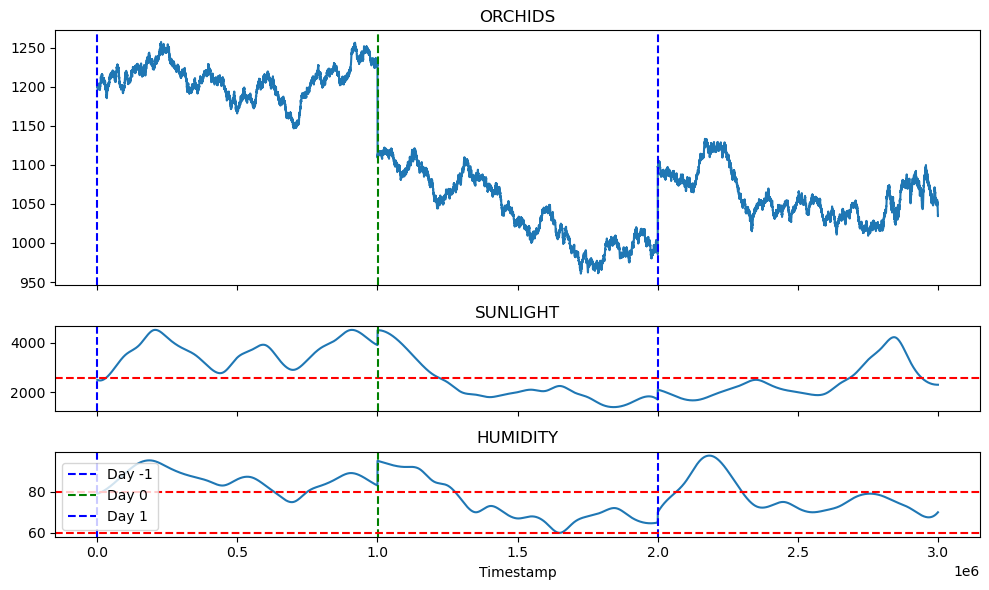

In [10]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'])
    axs[1].set_title('SUNLIGHT')
    # plot line at 2500
    axs[1].axhline(2555, color='red', linestyle='--')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'])
    axs[2].set_title('HUMIDITY')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    # Create dashed line between 60 to 80 for HUMIDITY plot
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [11]:
orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [12]:
from statsmodels.api import OLS

X = orchids[['HUMIDITY', 'SUNLIGHT', "ORCHIDS"]].iloc[:10001]
X = X.astype(float)
X["dHUMIDITY"] = X["HUMIDITY"].diff()
X["dSUNLIGHT"] = X["SUNLIGHT"].diff()

X["HUMIDITY^2"] = X["HUMIDITY"] ** 2
X["HUMIDITY_BT_60_80"] = (X["HUMIDITY"] > 60) & (X["HUMIDITY"] < 80)
X["SUNLIGHT_GT_2555"] = X["SUNLIGHT"] > 2555
X["SUNLIGHTxSUNLIGHT_GT_2555"] = X["SUNLIGHT"] * X["SUNLIGHT_GT_2555"]
X["HUMIDITYxHUMIDITY_BT_60_80"] = X["HUMIDITY"] * X["HUMIDITY_BT_60_80"]
X["HUMIDITY^2xHUMIDITY_BT_60_80"] = X["HUMIDITY^2"] * X["HUMIDITY_BT_60_80"]
                                        
X["ORCHIDS_LAGGED"] = X["ORCHIDS"]
X["dORCHIDS_LAGGED"] = X["ORCHIDS_LAGGED"].diff()

X["ORCHIDS_LAGGED_2"] = X["ORCHIDS"].shift(1)
X["ORCHIDS_LAGGED_3"] = X["ORCHIDS"].shift(2)
X["ORCHIDS"] = X["ORCHIDS"].shift(-1)

X["ORCHIDS_LAGGEDxHUMIDITY_BT_60_80"] = X["ORCHIDS_LAGGED"] * X["HUMIDITY_BT_60_80"]
X["ORCHIDS_LAGGEDxSUNLIGHT_GT_2555"] = X["ORCHIDS_LAGGED"] * X["SUNLIGHT_GT_2555"]
X["ORCHIDS_LAGGEDxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555"] = X["ORCHIDS_LAGGED"] * X["HUMIDITY_BT_60_80"] * X["SUNLIGHT_GT_2555"]
X["dORCHIDSxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555"] = X["dORCHIDS_LAGGED"] * X["HUMIDITY_BT_60_80"] * X["SUNLIGHT_GT_2555"]
X = X.dropna()
y = X.pop("ORCHIDS")
X = X.astype(float)
model = OLS(y, X.astype(float))
res = model.fit()


In [18]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS

def run_millions_of_models(data, oos_data, target_col, iterations=1000):
    results = []

    for _ in range(iterations):
        # Randomly select features
        selected_features = np.random.choice(data.columns, size=np.random.randint(3, len(data.columns)), replace=False)
        
        # Ensure target_col is in selected features
        if target_col not in selected_features:
            selected_features = np.append(selected_features, target_col)
        
        # Prepare X and y
        X = data[selected_features].copy()
        y = X.pop(target_col)
        X_oos = oos_data[selected_features].copy()
        y_oos = X_oos.pop(target_col)
        try:
            # Fit OLS model
            model = OLS(y, X.astype(float))
            res = model.fit()
            # out of sample mse
            y_oos_pred = res.predict(X_oos)
            res_oos = mean_squared_error(y_oos, y_oos_pred)

        except Exception as e:
            print(e)
            continue
        
        # Store results
        result = {
            "features": list(X.columns),
            "p_vals": res.pvalues,
            "r_squared": res.rsquared,
            "mse_oos": res_oos,
            "model": res
        }
        results.append(result)
    
    return pd.DataFrame(results)

# Example usage
data = orchids[['HUMIDITY', 'SUNLIGHT', "ORCHIDS"]]
data["dHUMIDITY"] = data["HUMIDITY"].diff()
data["dSUNLIGHT"] = data["SUNLIGHT"].diff()
data["HUMIDITY^2"] = data["HUMIDITY"] ** 2
data["HUMIDITY_BT_60_80"] = (data["HUMIDITY"] > 60) & (data["HUMIDITY"] < 80)
data["SUNLIGHT_GT_2555"] = data["SUNLIGHT"] > 2555
data["SUNLIGHTxSUNLIGHT_GT_2555"] = data["SUNLIGHT"] * data["SUNLIGHT_GT_2555"]
data["HUMIDITYxHUMIDITY_BT_60_80"] = data["HUMIDITY"] * data["HUMIDITY_BT_60_80"]
data["HUMIDITY^2xHUMIDITY_BT_60_80"] = data["HUMIDITY^2"] * data["HUMIDITY_BT_60_80"]
data["ORCHIDS_LAGGED"] = data["ORCHIDS"]
data["dORCHIDS_LAGGED"] = data["ORCHIDS_LAGGED"].diff()
data["ORCHIDS_LAGGED_2"] = data["ORCHIDS"].shift(1)
data["ORCHIDS_LAGGED_3"] = data["ORCHIDS"].shift(2)
data["ORCHIDS"] = data["ORCHIDS"].shift(-1)
data["ORCHIDS_LAGGEDxHUMIDITY_BT_60_80"] = data["ORCHIDS_LAGGED"] * data["HUMIDITY_BT_60_80"]
data["ORCHIDS_LAGGEDxSUNLIGHT_GT_2555"] = data["ORCHIDS_LAGGED"] * data["SUNLIGHT_GT_2555"]
data["ORCHIDS_LAGGEDxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555"] = data["ORCHIDS_LAGGED"] * data["HUMIDITY_BT_60_80"] * data["SUNLIGHT_GT_2555"]
data["dORCHIDSxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555"] = data["dORCHIDS_LAGGED"] * data["HUMIDITY_BT_60_80"] * data["SUNLIGHT_GT_2555"]
data["ROLLED_ORCHIDS_VOL"] = data["ORCHIDS"].rolling(window=10).std()
data["ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80"] = data["ROLLED_ORCHIDS_VOL"] * data["HUMIDITY_BT_60_80"]
data = data.dropna()

results_df = run_millions_of_models(data.iloc[0:9997].copy(deep=True),data.iloc[10003:].copy(deep=True), "ORCHIDS")
results_df.head()


/tmp/ipykernel_89937/3222900972.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dHUMIDITY"] = data["HUMIDITY"].diff()
/tmp/ipykernel_89937/3222900972.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dSUNLIGHT"] = data["SUNLIGHT"].diff()
/tmp/ipykernel_89937/3222900972.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,features,p_vals,r_squared,mse_oos,model
0,"[ORCHIDS_LAGGED_3, HUMIDITY^2xHUMIDITY_BT_60_8...",ORCHIDS_LAGGED_3 3.934...,0.999999,2.722261,<statsmodels.regression.linear_model.Regressio...
1,[ORCHIDS_LAGGEDxHUMIDITY_BT_60_80xSUNLIGHT_GT_...,ORCHIDS_LAGGEDxHUMIDITY_BT_60_80xSUNLIGHT_GT_2...,0.999998,2.628078,<statsmodels.regression.linear_model.Regressio...
2,"[ORCHIDS_LAGGED, dHUMIDITY, dORCHIDSxHUMIDITY_...",ORCHIDS_LAGGED ...,0.999999,3.553251,<statsmodels.regression.linear_model.Regressio...
3,"[dSUNLIGHT, dHUMIDITY, ROLLED_ORCHIDS_VOLxHUMI...",dSUNLIGHT ...,0.999999,1.745130,<statsmodels.regression.linear_model.Regressio...
4,"[HUMIDITYxHUMIDITY_BT_60_80, ORCHIDS_LAGGED_2,...",HUMIDITYxHUMIDITY_BT_60_80 ...,0.999999,6.711996,<statsmodels.regression.linear_model.Regressio...


In [19]:
results_df.sort_values("mse_oos").head(10)

,features,p_vals,r_squared,mse_oos,model
88,"[ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80, SUNLIGH...",ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80 ...,0.999998,1.714607,<statsmodels.regression.linear_model.Regressio...
53,"[ORCHIDS_LAGGED, SUNLIGHT, ORCHIDS_LAGGEDxHUMI...",ORCHIDS_LAGGED 0.0000...,0.999998,1.715917,<statsmodels.regression.linear_model.Regressio...
162,"[ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80, dHUMIDI...",ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80 ...,0.999998,1.716493,<statsmodels.regression.linear_model.Regressio...
539,"[HUMIDITY^2xHUMIDITY_BT_60_80, ROLLED_ORCHIDS_...",HUMIDITY^2xHUMIDITY_BT_60_80 0.7603...,0.999998,1.717344,<statsmodels.regression.linear_model.Regressio...
963,"[dORCHIDS_LAGGED, ORCHIDS_LAGGED, dORCHIDSxHUM...",dORCHIDS_LAGGED ...,0.999998,1.718171,<statsmodels.regression.linear_model.Regressio...
871,"[HUMIDITY^2xHUMIDITY_BT_60_80, dORCHIDSxHUMIDI...",HUMIDITY^2xHUMIDITY_BT_60_80 ...,0.999998,1.718324,<statsmodels.regression.linear_model.Regressio...
854,"[ORCHIDS_LAGGED_2, dORCHIDS_LAGGED, HUMIDITY_B...",ORCHIDS_LAGGED_2 0.000...,0.999998,1.720706,<statsmodels.regression.linear_model.Regressio...
388,"[ORCHIDS_LAGGEDxHUMIDITY_BT_60_80, ROLLED_ORCH...",ORCHIDS_LAGGEDxHUMIDITY_BT_60_80 0.8295...,0.999998,1.720766,<statsmodels.regression.linear_model.Regressio...
473,"[ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80, ORCHIDS...",ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80 ...,0.999998,1.720990,<statsmodels.regression.linear_model.Regressio...
114,"[SUNLIGHTxSUNLIGHT_GT_2555, dSUNLIGHT, HUMIDIT...",SUNLIGHTxSUNLIGHT_GT_2555 0.5575...,0.999998,1.721740,<statsmodels.regression.linear_model.Regressio...


In [20]:
for feat in results_df.sort_values("mse_oos").head(10)["features"]:
    print(feat)

['ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80', 'SUNLIGHT', 'ORCHIDS_LAGGEDxSUNLIGHT_GT_2555', 'HUMIDITY^2', 'ORCHIDS_LAGGEDxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555', 'ORCHIDS_LAGGED', 'dHUMIDITY']
['ORCHIDS_LAGGED', 'SUNLIGHT', 'ORCHIDS_LAGGEDxHUMIDITY_BT_60_80', 'ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80', 'ORCHIDS_LAGGED_2']
['ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80', 'dHUMIDITY', 'dORCHIDSxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555', 'dORCHIDS_LAGGED', 'SUNLIGHTxSUNLIGHT_GT_2555', 'ORCHIDS_LAGGED', 'HUMIDITYxHUMIDITY_BT_60_80']
['HUMIDITY^2xHUMIDITY_BT_60_80', 'ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80', 'ORCHIDS_LAGGED', 'HUMIDITY_BT_60_80']
['dORCHIDS_LAGGED', 'ORCHIDS_LAGGED', 'dORCHIDSxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555', 'HUMIDITYxHUMIDITY_BT_60_80', 'HUMIDITY^2', 'dHUMIDITY', 'SUNLIGHT_GT_2555', 'ORCHIDS_LAGGED_3', 'ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80']
['HUMIDITY^2xHUMIDITY_BT_60_80', 'dORCHIDSxHUMIDITY_BT_60_80xSUNLIGHT_GT_2555', 'ORCHIDS_LAGGEDxSUNLIGHT_GT_2555', 'HUMIDITY^2', 'dORCHIDS_LAGGED', 'ORCHIDS

In [22]:
sm.OLS(data["ORCHIDS"], data[['ORCHIDS_LAGGED', 'HUMIDITY^2xHUMIDITY_BT_60_80', 'ROLLED_ORCHIDS_VOL', 'ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ORCHIDS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.857e+09
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        01:51:43   Log-Likelihood:                         -52108.
No. Observations:               29993   AIC:                                  1.042e+05
Df Residuals:                   29989   BIC:                                  1.043e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
ORCHIDS_LAGGED                           1.0001   1.32e-05   7.57e+04      0.000       1.000       1.000
HUMIDITY^2xHUMIDITY_BT_60_80          -6.32e-05   3.96e-06    -15.959      0.000    -7.1e-05   -5.54e-05
ROLLED_ORCHIDS_VOL                      -0.1506      0.008    -18.328      0.000      -0.167      -0.134
ROLLED_ORCHIDS_VOLxHUMIDITY_BT_60_80     0.2834      0.012     24.402      0.000       0.261       0.306
==============================================================================
Omnibus:                    22264.496   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8973928828.256
Skew:                          -1.318   Prob(JB):                         0.00
Kurtosis:                    2682.704   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
data = orchids[['HUMIDITY', 'SUNLIGHT', "ORCHIDS"]]
data["HUMIDITY_OUT_60_80"] = (data["HUMIDITY"] < 60) | (data["HUMIDITY"] > 80)
data["HUMIDITY_LT_60"] = data["HUMIDITY"] < 60
data["HUMIDITY_GT_80"] = data["HUMIDITY"] > 80
data["SUNLIGHT_LT_2555"] = data["SUNLIGHT"] < 2555
data["SUNLIGHTxSUNLIGHT_LT_2555"] = data["SUNLIGHT"] * data["SUNLIGHT_LT_2555"]
data["HUMIDITYxHUMIDITY_OUT_60_80"] = data["HUMIDITY"] * data["HUMIDITY_OUT_60_80"]

data["ORCHIDS_LAGGED"] = data["ORCHIDS"]

data["ORCHIDS"] = data["ORCHIDS"].shift(-1)

data["ROLLED_ORCHIDS_VOL"] = data["ORCHIDS"].rolling(window=10).std()
data["ROLLED_ORCHIDS_VOLxHUMIDITY_OUT_60_80"] = data["ROLLED_ORCHIDS_VOL"] * data["HUMIDITY_OUT_60_80"]
data["ROLLED_ORCHIDS_VOLxSUNLIGHT_LT_2555"] = data["ROLLED_ORCHIDS_VOL"] * data["SUNLIGHT_LT_2555"]
data["ROLLED_ORCHIDS_VOLxHUMIDITY_LT_60"] = data["ROLLED_ORCHIDS_VOL"] * data["HUMIDITY_LT_60"]
data["ROLLED_ORCHIDS_VOLxHUMIDITY_GT_80"] = data["ROLLED_ORCHIDS_VOL"] * data["HUMIDITY_GT_80"]
data["ROLLED_ORCHIDS_VOLxHUMIDITY_OUT_60_80xSUNLIGHT_LT_2555"] = data["ROLLED_ORCHIDS_VOL"] * data["HUMIDITY_OUT_60_80"] * data["SUNLIGHT_LT_2555"]

data["SUNLIGHT_INCREASING"] = data["SUNLIGHT"].diff() > 0
data["HUMIDITY_INCREASING"] = data["HUMIDITY"].diff() > 0
data = data.dropna().astype(float)

/tmp/ipykernel_89937/1938747816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HUMIDITY_OUT_60_80"] = (data["HUMIDITY"] < 60) | (data["HUMIDITY"] > 80)
/tmp/ipykernel_89937/1938747816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HUMIDITY_LT_60"] = data["HUMIDITY"] < 60
/tmp/ipykernel_89937/1938747816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [61]:
m = OLS(data["ORCHIDS"], data[[
    'ORCHIDS_LAGGED',
    'ROLLED_ORCHIDS_VOLxSUNLIGHT_LT_2555', 
    'ROLLED_ORCHIDS_VOLxHUMIDITY_OUT_60_80xSUNLIGHT_LT_2555',
    'SUNLIGHT_INCREASING',
    'HUMIDITY_INCREASING',
    'ROLLED_ORCHIDS_VOLxHUMIDITY_LT_60',
    'ROLLED_ORCHIDS_VOLxHUMIDITY_GT_80'
    ]])
res = m.fit()

In [62]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ORCHIDS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.756e+09
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        02:12:21   Log-Likelihood:                         -52210.
No. Observations:               29993   AIC:                                  1.044e+05
Df Residuals:                   29986   BIC:                                  1.045e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
ORCHIDS_LAGGED                                             1.0000   1.25e-05   8.01e+04      0.000       1.000       1.000
ROLLED_ORCHIDS_VOLxSUNLIGHT_LT_2555                        0.0793      0.007     10.794      0.000       0.065       0.094
ROLLED_ORCHIDS_VOLxHUMIDITY_OUT_60_80xSUNLIGHT_LT_2555     0.0024      0.021      0.118      0.906      -0.038       0.043
SUNLIGHT_INCREASING                                        0.0192      0.016      1.165      0.244      -0.013       0.052
HUMIDITY_INCREASING                                       -0.0178      0.016     -1.081      0.280      -0.050       0.014
ROLLED_ORCHIDS_VOLxHUMIDITY_LT_60                          0.1309      0.401      0.327      0.744      -0.654       0.916
ROLLED_ORCHIDS_VOLxHUMIDITY_GT_80                         -0.1035      0.007    -13.878      0.000      -0.118      -0.089
==============================================================================
Omnibus:                    21976.803   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       9839371431.208
Skew:                          -1.257   Prob(JB):                         0.00
Kurtosis:                    2808.945   Cond. No.                     5.56e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
data["ROLLED_ORCHIDS_VOL"].mean()

1.2994226254845729

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
m = DecisionTreeRegressor(max_depth=3)
X = data
y = X.pop("ORCHIDS")
m.fit(X, y)

DecisionTreeRegressor(max_depth=3)

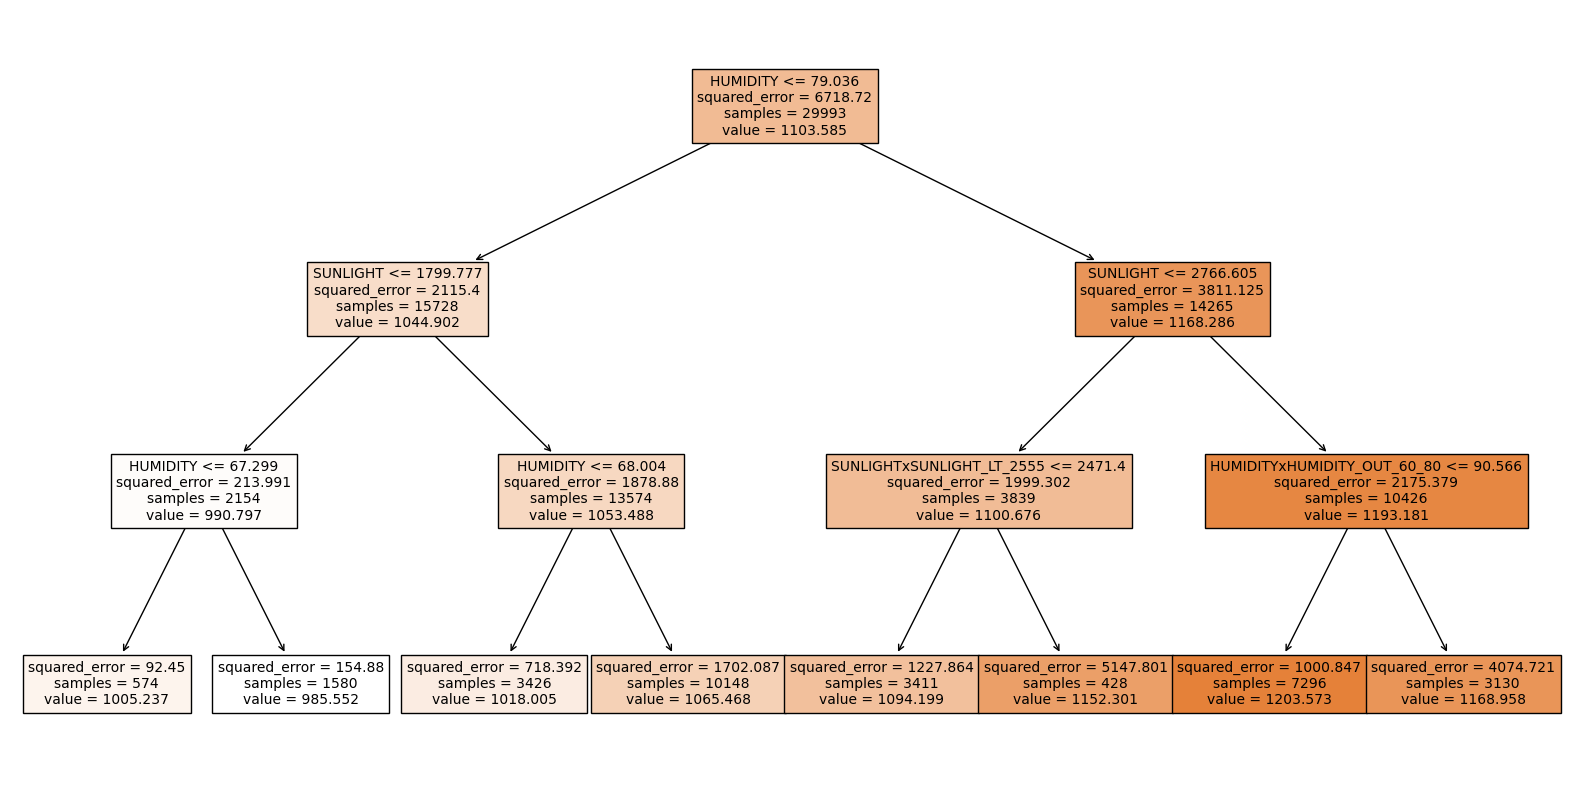

In [43]:
# plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(m, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

In [80]:
np.mean((res.predict(X) - y)**2)

0.9546786484079872

In [81]:
np.mean((y.shift(1) - y)**2)

0.9568057917375212

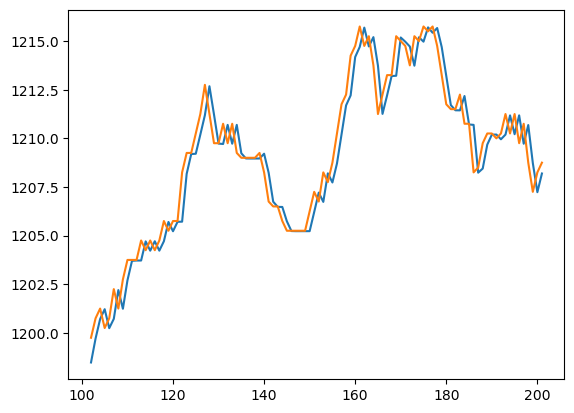

In [82]:
plt.plot(res.predict(X.astype(float)[100:200]))
plt.plot(y[100:200])

In [56]:
12/(1_000_000/100) * 7

0.0084

$$
P(7h) = S_i | F
$$

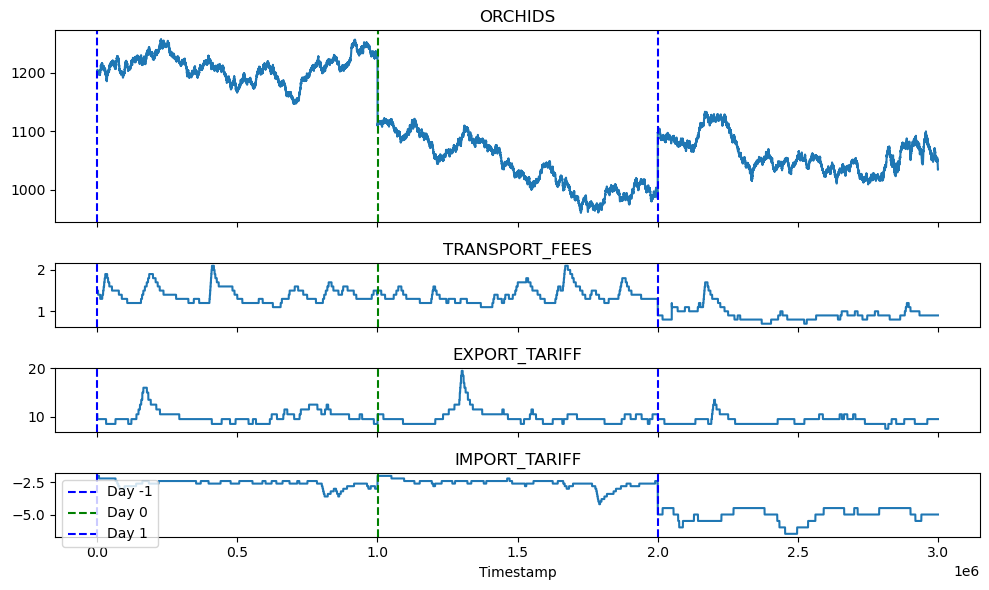

In [9]:
def plot_orchids_fees_tariffs(df):
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1, 1]})

    axs[0].plot(df['new_timestamp'], df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    
    # Plot TRANSPORT_FEES vs new_timestamp
    axs[0+1].plot(df['new_timestamp'], df['TRANSPORT_FEES'])
    axs[0+1].set_title('TRANSPORT_FEES')
    
    # Plot EXPORT_TARIFF vs new_timestamp
    axs[1+1].plot(df['new_timestamp'], df['EXPORT_TARIFF'])
    axs[1+1].set_title('EXPORT_TARIFF')
    
    # Plot IMPORT_TARIFF vs new_timestamp
    axs[2+1].plot(df['new_timestamp'], df['IMPORT_TARIFF'])
    axs[2+1].set_title('IMPORT_TARIFF')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_fees_tariffs(orchids)

### Analyze Data

The code below produces a correlation matrix of all variables in the dataframe. 

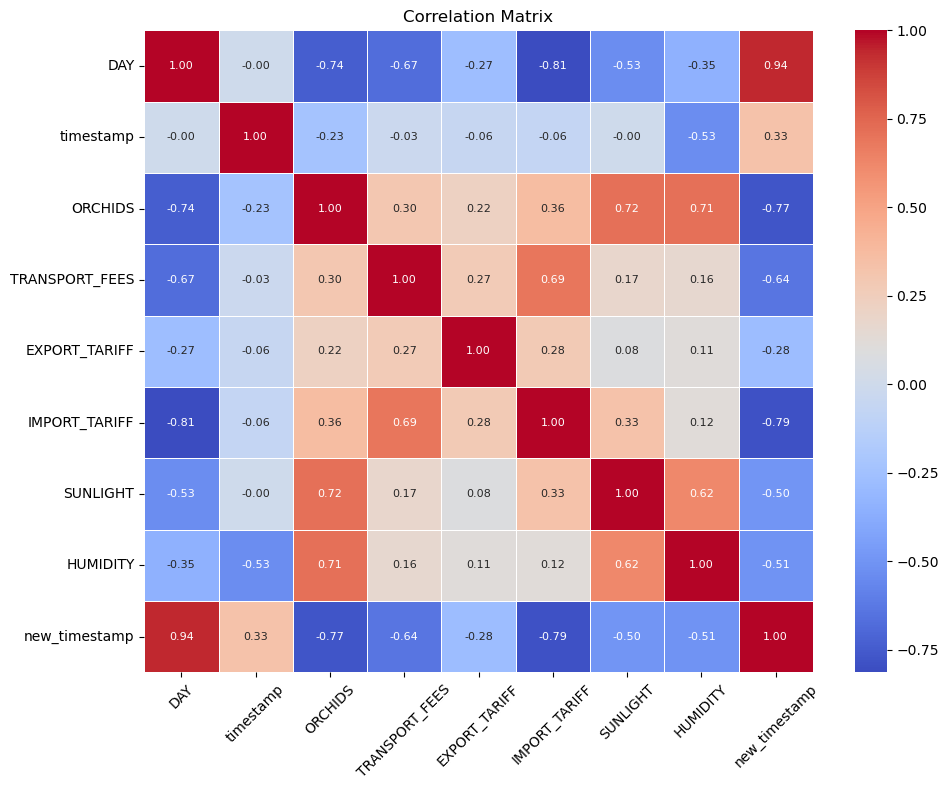

In [10]:
correlation_matrix = orchids.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The code below runs an OLS regression using sunlight and humidity to predict the price of orchids

In [11]:
import statsmodels.api as sm

X = orchids[['SUNLIGHT', 'HUMIDITY']]
y = orchids['ORCHIDS']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ORCHIDS   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                 2.514e+04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:52:19   Log-Likelihood:            -1.6001e+05
No. Observations:               30003   AIC:                         3.200e+05
Df Residuals:                   30000   BIC:                         3.201e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        693.3201      2.593    267.428      0.0

### Sunlight Conversion

# Still working on it

In [12]:
daily_sunlight = (orchids.groupby(['DAY'])['SUNLIGHT'].sum())/60000
daily_sunlight

DAY
-1    603.352013
 0    379.960218
 1    405.363262
Name: SUNLIGHT, dtype: float64

In [13]:
daily_sunlight = orchids.groupby(['DAY'])['SUNLIGHT'].median()

# Calculate number of hours of sunlight per day
average_sunlight_per_hour = 2500  # Average sunlight per hour
hours_of_sunlight_per_day = daily_sunlight / average_sunlight_per_hour

# Add the number of hours of sunlight per day to the DataFrame
orchids['Hours_of_Sunlight_Per_Day'] = orchids['DAY'].map(hours_of_sunlight_per_day)

orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,Hours_of_Sunlight_Per_Day
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0,1.466765
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,1.466765
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,1.466765
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,1.466765
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,1.466765
...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,0.887683
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,0.887683
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,0.887683
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,0.887683


In [14]:
orchids = orchids[orchids['DAY'] == 1]
orchids = orchids[orchids['timestamp'] <= 10000]
daily_sunlight = orchids['ORCHIDS'].median()
daily_sunlight

1099.75

In [15]:
# Function to split the sunlight data into equal parts and calculate median for each part
def split_and_median(series, num_parts):
    # Calculate the number of elements per part
    elements_per_part = len(series) // num_parts
    
    # Split the series into equal parts
    parts = [series[i*elements_per_part:(i+1)*elements_per_part] for i in range(num_parts)]
    
    # Calculate the median for each part, excluding NaN values
    medians = [np.nanmedian(part) for part in parts]
    
    return medians

# Apply the function to each day and concatenate the results
hourly_median_sunlight = orchids.groupby('DAY').apply(split_and_median, num_parts=num_parts)

# Calculate the final median for each day
final_median_sunlight = hourly_median_sunlight.groupby('DAY').median()

# Print the final median sunlight for each day
print(final_median_sunlight)

NameError: name 'num_parts' is not defined

In [16]:
average_sunlight = 7/24*10000
average_sunlight

2916.666666666667

In [17]:
#import decision tree
from sklearn.tree import DecisionTreeRegressor

In [18]:
orchids["interaction"] = orchids["SUNLIGHT"].diff() * orchids["HUMIDITY"].diff()

In [19]:
m = DecisionTreeRegressor(max_depth=4)


X = orchids[['SUNLIGHT', 'HUMIDITY']]
X["ORCHIDS_LAGG"] = orchids["ORCHIDS"].shift(1)
#X["const"] = 1
y = orchids['ORCHIDS']

m.fit(X, y)

/tmp/ipykernel_45603/2487653004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ORCHIDS_LAGG"] = orchids["ORCHIDS"].shift(1)


DecisionTreeRegressor(max_depth=4)

In [20]:
orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,Hours_of_Sunlight_Per_Day,interaction
20002,1,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,2000200,0.887683,NaN
20003,1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,2000300,0.887683,-0.005519
20004,1,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,2000400,0.887683,-0.005531
20005,1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,2000500,0.887683,-0.005543
20006,1,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,2000600,0.887683,-0.005558
...,...,...,...,...,...,...,...,...,...,...,...
20098,1,9600,1090.25,0.9,9.5,-5.0,2072.6443,72.015720,2009800,0.887683,-0.006283
20099,1,9700,1089.75,0.9,9.5,-5.0,2072.3196,72.035065,2009900,0.887683,-0.006281
20100,1,9800,1089.50,0.9,9.5,-5.0,2071.9940,72.054380,2010000,0.887683,-0.006289
20101,1,9900,1088.75,0.9,9.5,-5.0,2071.6675,72.073670,2010100,0.887683,-0.006298


In [21]:
((m.predict(X)-y)**2).sum()

62.80088869463869

In [22]:
((y.shift(1)-y)**2).sum()

99.4375

In [23]:
df["ORCHIDS"]

NameError: name 'df' is not defined